In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


In [144]:
#read excel file with columns to be used
df = pd.read_excel('Solaranlage_2020.xlsx', 
                    skiprows=3, usecols=['### UNIX-Zeitstempel',' Entladung(Wh)', ' Ladung(Wh)',
       ' Erzeugung(Wh)', ' Verbrauch(Wh)', ' Netz-Einspeisung(Wh)',
       ' Netz-Bezug(Wh)'], index_col='### UNIX-Zeitstempel')  
#rename columns without leading whitespace
original_columns = list(df.columns)
new_cols = []
for col in original_columns:
    new_cols.append(col.strip())
#create dict to rename cols
col_dict = dict(zip(original_columns, new_cols))
#set index as datetime 
df.index = pd.to_datetime(df.index, unit='s', utc=True).map(lambda x: x.tz_convert('Europe/Berlin'))
df.index.rename('Datum',inplace=True)
df.rename(columns=col_dict, inplace=True)
df.sort_index(inplace=True)  
#calculate kwh from Wh
kwh_df = df / 1000    
#rename columns to Kwh
for col in kwh_df.columns:
    kwh_df.rename(columns={col: col.replace('(Wh)','(Kwh)')}, inplace=True)
kwh_df.head()


,Entladung(Kwh),Ladung(Kwh),Erzeugung(Kwh),Verbrauch(Kwh),Netz-Einspeisung(Kwh),Netz-Bezug(Kwh)
Datum,,,,,,
2020-10-27 14:25:00+01:00,0.0,0.0,0.0,0.03038,0.0,0.03038
2020-10-27 14:30:00+01:00,0.0,0.0,0.0,0.03043,0.0,0.03043
2020-10-27 14:35:00+01:00,0.0,0.0,0.0,0.02784,0.0,0.02784
2020-10-27 14:40:00+01:00,0.0,0.0,0.0,0.02902,0.0,0.02902
2020-10-27 14:45:00+01:00,0.0,0.0,0.0,0.02839,0.0,0.02839


In [151]:
#wie viel wird erzeugt?
kwh_df['cumsum_erzeugung']=kwh_df['Erzeugung(Kwh)'].cumsum()
#wie viel wird verbraucht?
kwh_df['cumsum_verbrauch']=kwh_df['Verbrauch(Kwh)'].cumsum()
#wie viel wird eingespeist?
kwh_df['cumsum_einspeisung']=kwh_df['Netz-Einspeisung(Kwh)'].cumsum()
#wie viel wird bezogen?
kwh_df['cumsum_bezug']=kwh_df['Netz-Bezug(Kwh)'].cumsum()
kwh_df['energiepotenzial']=kwh_df['cumsum_erzeugung']-kwh_df['cumsum_verbrauch']-kwh_df['cumsum_einspeisung'] + kwh_df['cumsum_bezug']


In [163]:
#pick a random single day from df
day = kwh_df['2020-11-06':'2020-11-06']
day.head()


,Entladung(Kwh),Ladung(Kwh),Erzeugung(Kwh),Verbrauch(Kwh),Netz-Einspeisung(Kwh),Netz-Bezug(Kwh),cumsum_erzeugung,cumsum_verbrauch,energiepotenzial,cumsum_einspeisung,cumsum_bezug
Datum,,,,,,,,,,,
2020-11-06 00:00:00+01:00,0.01463,0.0,0.0,0.01721,0.0,0.00258,82.92343,63.31307,1.19139,55.1551,36.73613
2020-11-06 00:05:00+01:00,0.01720,0.0,0.0,0.01988,0.0,0.00268,82.92343,63.33295,1.17419,55.1551,36.73881
2020-11-06 00:10:00+01:00,0.01376,0.0,0.0,0.01638,0.0,0.00262,82.92343,63.34933,1.16043,55.1551,36.74143
2020-11-06 00:15:00+01:00,0.01250,0.0,0.0,0.01512,0.0,0.00262,82.92343,63.36445,1.14793,55.1551,36.74405
2020-11-06 00:20:00+01:00,0.01417,0.0,0.0,0.01682,0.0,0.00265,82.92343,63.38127,1.13376,55.1551,36.74670


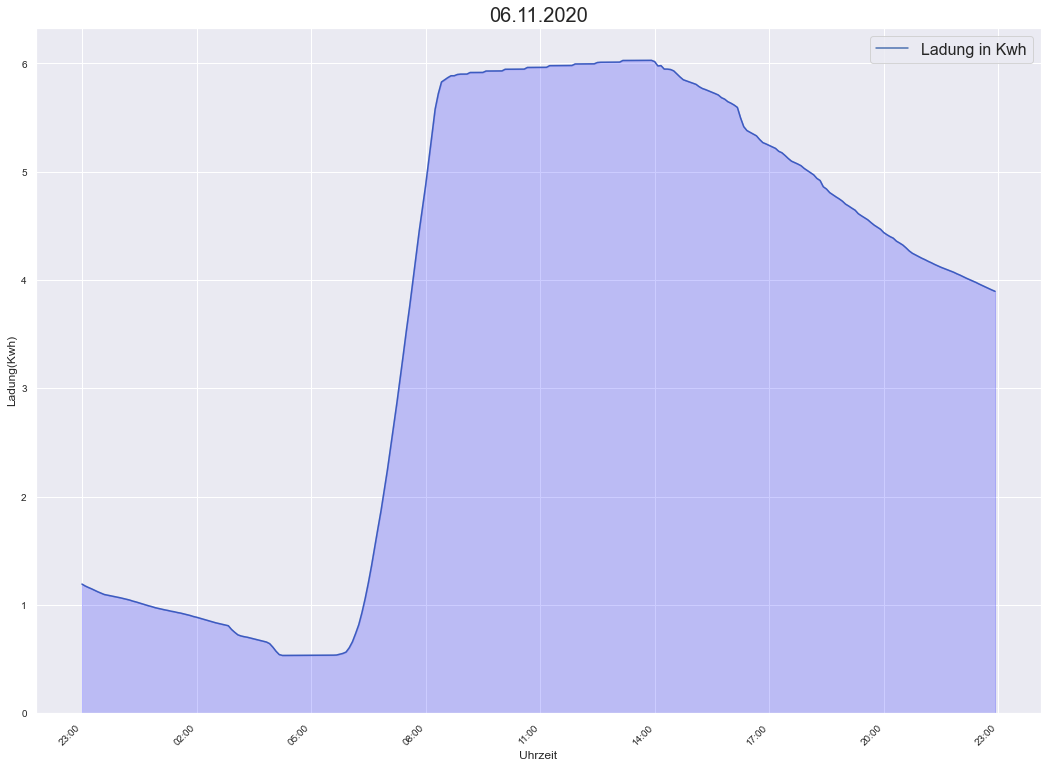

In [164]:
custom_params = {
                 'figure.figsize':(18,14),
                 "font.size":20,
                 "axes.titlesize":20,
                 "axes.labelsize":12,
                 "legend.fontsize":16,
                 "xtick.labelsize":10,
                 "ytick.labelsize":10}
sns.set_theme(style="darkgrid", rc=custom_params)
# Define the date format
date_form = DateFormatter("%H:%M")


fig, ax = plt.subplots()
#g0 = sns.lineplot(x="Datum", y=5, data=day, ax=ax, label='Maximale Ladung')
g1 = sns.lineplot(x='Datum', y='energiepotenzial', data=day, ax=ax, label='Ladung in Kwh')
#plot area under curve
day['energiepotenzial'].plot.area(stacked=False, alpha=0.2, ax=ax, legend=False, color='blue')

plt.title(day.index[0].strftime('%d.%m.%Y'))
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('Uhrzeit')
plt.ylabel('Ladung(Kwh)')
plt.xticks(rotation=45)
plt.show()

In [65]:
df.head()

,Entladung(Wh),Ladung(Wh),Erzeugung(Wh),Verbrauch(Wh),Netz-Einspeisung(Wh),Netz-Bezug(Wh)
Datum,,,,,,
2020-10-27 14:25:00,0.0,0.0,0.0,30.38,0.0,30.38
2020-10-27 14:30:00,0.0,0.0,0.0,30.43,0.0,30.43
2020-10-27 14:35:00,0.0,0.0,0.0,27.84,0.0,27.84
2020-10-27 14:40:00,0.0,0.0,0.0,29.02,0.0,29.02
2020-10-27 14:45:00,0.0,0.0,0.0,28.39,0.0,28.39
